In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#https://www.kaggle.com/vanvalkenberg/cnnformaskdetection-improved-size-and-performance

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import os
import cv2

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
batch_size = 40
img_height = 200
img_width = 200

In [ ]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data_mask',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 13603 files belonging to 2 classes.
Using 10883 files for training.


In [ ]:
## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/content/drive/MyDrive/data_mask',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 13603 files belonging to 2 classes.
Using 2720 files for validation.


In [ ]:
## loading testing data
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/content/drive/MyDrive/Validate_data',
    validation_split=0.9,
    subset= "validation",
    seed=10,
    image_size= (img_height, img_width),
    batch_size=10

)

Found 12 files belonging to 2 classes.
Using 10 files for validation.


In [ ]:
class_names = validation_ds.class_names

In [ ]:
class_names

['with_mask', 'without_mask']

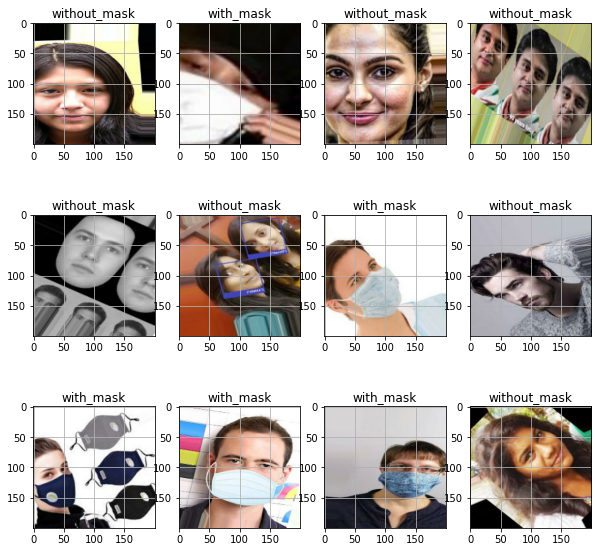

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

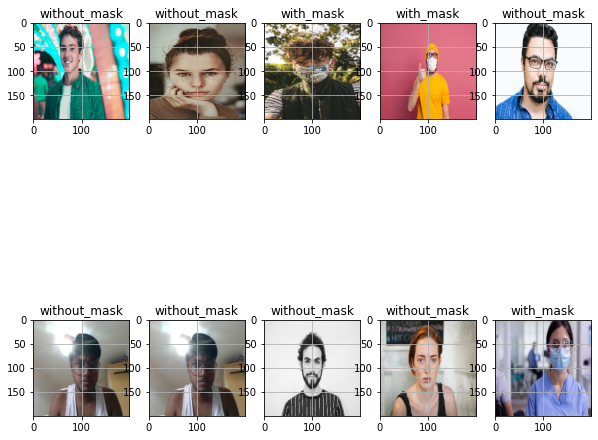

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in validation_ds.take(1):
  for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [ ]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
## lets define our CNN
MyCnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  # Some thing I realised just
  # using flatten layer will 
  # increase the size of your
  # model, hence use
  # Global avg Pooling 
  # instead
  # layers.Flatten(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2, activation= 'softmax')
])

In [ ]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
## lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data= testing_ds, epochs = 15)

Epoch 1/15
273/273 [==============================] - 12s 44ms/step - loss: 0.2694 - accuracy: 0.8895 - val_loss: 0.2488 - val_accuracy: 0.9000
Epoch 2/15
273/273 [==============================] - 12s 44ms/step - loss: 0.2474 - accuracy: 0.9013 - val_loss: 0.2290 - val_accuracy: 0.9114
Epoch 3/15
273/273 [==============================] - 12s 45ms/step - loss: 0.2308 - accuracy: 0.9086 - val_loss: 0.2270 - val_accuracy: 0.9147
Epoch 4/15
273/273 [==============================] - 12s 44ms/step - loss: 0.2224 - accuracy: 0.9116 - val_loss: 0.2240 - val_accuracy: 0.9165
Epoch 5/15
273/273 [==============================] - 12s 44ms/step - loss: 0.2112 - accuracy: 0.9188 - val_loss: 0.2232 - val_accuracy: 0.9176
Epoch 6/15
273/273 [==============================] - 12s 44ms/step - loss: 0.2047 - accuracy: 0.9203 - val_loss: 0.2053 - val_accuracy: 0.9250
Epoch 7/15
273/273 [==============================] - 12s 44ms/step - loss: 0.1938 - accuracy: 0.9238 - val_loss: 0.2021 - val_accuracy:

In [ ]:
#
#https://stackoverflow.com/questions/43469281/how-to-predict-input-image-using-trained-model-in-keras
MyCnn.save('model.h5')

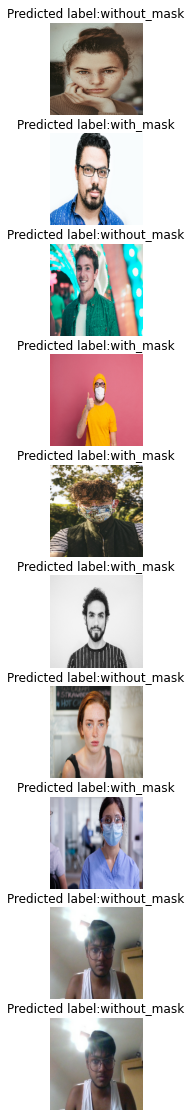

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in validation_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(10):
        ax = plt.subplot(10,1
                         , i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)
    

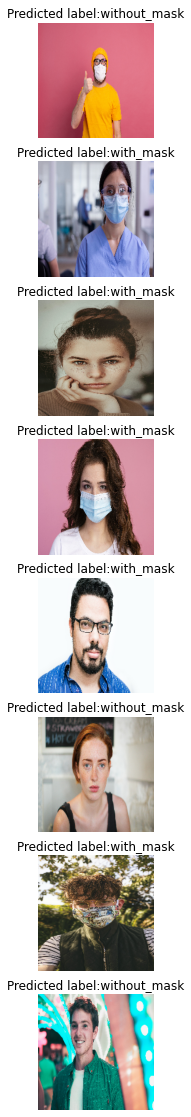

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in validation_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(8):
        ax = plt.subplot(8,1, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)

In [ ]:
# from keras.models import load_model
# import cv2
# import numpy as np

# model = load_model('model.h5')

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# img = cv2.imread('/content/drive/MyDrive/data/with_mask/with_mask_1036.jpg')
# img = cv2.resize(img,(200,200))
# img = np.reshape(img,[1,200,200,3])

# classes = model.class_names(img)

# print(classes)